## Import Libraries

In [4]:
import numpy as np
import pandas as pd 
import cv2
from PIL import Image 
import matplotlib.pyplot as plt 
%matplotlib inline 
import os
from os import listdir
from os.path import isfile, join 

## Load and Preprocess Images

In [5]:
def load_images_from_folder(folder):
    train_data = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename), cv2.IMREAD_GRAYSCALE)
        img= ~img
        if img is not None:
                ret, thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
                ctrs, ret = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
                cnt = sorted(ctrs, key = lambda ctr: cv2.boundingRect(ctr)[0])
                w = int(28)
                h = int(28)
                maxi = 0
                for c in cnt:
                    x,y,w,h = cv2.boundingRect(c)
                    maxi = max(w*h,maxi)
                    if maxi == w*h:
                        x_max = x
                        y_max = y
                        w_max = w
                        h_max = h
                im_crop = thresh[y_max: y_max + h_max + 10, x_max: x_max + w_max + 10]
                im_resize = cv2.resize(im_crop,(28,28))
                im_resize = np.reshape(im_resize,(784,1))
                train_data.append(im_resize)
    return train_data

In [6]:
data = []

## Load Data for Different Classes

In [7]:
data = load_images_from_folder('C:\\Users\\HP\\OneDrive\\Desktop\\extracted_images\\-')
len(data)
for i in range(0, len(data)):
    data[i] = np.append(data[i], ['10'])
print(len(data))

33997


In [8]:
data11 = load_images_from_folder('C:\\Users\\HP\\OneDrive\\Desktop\\extracted_images\\+')
for i in range(0,len(data11)):
        data11[i] = np.append(data11[i],['11'])
data = np.concatenate((data,data11))
print(len(data))

59109


In [9]:
data0 = load_images_from_folder('C:\\Users\\HP\\OneDrive\\Desktop\\extracted_images\\0')
for i in range(0,len(data0)):
        data0[i] = np.append(data0[i],['0'])
data = np.concatenate((data,data0))
print(len(data))

66023


In [10]:
data1 = load_images_from_folder('C:\\Users\\HP\\OneDrive\\Desktop\\extracted_images\\1')
for i in range(0,len(data1)):
        data1[i] = np.append(data1[i],['1'])
data = np.concatenate((data,data1))
print(len(data))

92543


In [11]:
data2 = load_images_from_folder('C:\\Users\\HP\\OneDrive\\Desktop\\extracted_images\\2')
for i in range(0,len(data2)):
        data2[i] = np.append(data2[i],['2'])
data = np.concatenate((data,data2))
print(len(data))

118684


In [12]:
data3 = load_images_from_folder('C:\\Users\\HP\\OneDrive\\Desktop\\extracted_images\\3')
for i in range(0,len(data3)):
        data3[i] = np.append(data3[i],['3'])
data = np.concatenate((data,data3))
print(len(data))

129593


In [13]:
data4 = load_images_from_folder('C:\\Users\\HP\\OneDrive\\Desktop\\extracted_images\\4')
for i in range(0,len(data4)):
        data4[i] = np.append(data4[i],['4'])
data = np.concatenate((data, data4))
print(len(data))

136989


In [14]:
data5 = load_images_from_folder('C:\\Users\\HP\\OneDrive\\Desktop\\extracted_images\\5')
for i in range(0,len(data5)):
        data5[i] = np.append(data5[i],['5'])
data = np.concatenate((data,data5))
print(len(data))

140534


In [15]:
data6 = load_images_from_folder('C:\\Users\\HP\\OneDrive\\Desktop\\extracted_images\\1')
for i in range(0,len(data6)):
        data6[i] = np.append(data6[i],['1'])
data = np.concatenate((data,data6))
print(len(data))

167054


In [16]:
data7 = load_images_from_folder('C:\\Users\\HP\\OneDrive\\Desktop\\extracted_images\\7')
for i in range(0,len(data7)):
        data7[i] = np.append(data7[i],['7'])
data = np.concatenate((data,data7))
print(len(data))

169963


In [17]:
data8 = load_images_from_folder('C:\\Users\\HP\\OneDrive\\Desktop\\extracted_images\\8')
for i in range(0,len(data8)):
        data8[i] = np.append(data8[i],['8'])
data = np.concatenate((data,data8))
print(len(data))

173031


In [18]:
data9 = load_images_from_folder('C:\\Users\\HP\\OneDrive\\Desktop\\extracted_images\\9')
for i in range(0,len(data9)):
        data9[i] = np.append(data9[i],['9'])
data = np.concatenate((data,data9))
print(len(data))

176768


In [19]:
data12 = load_images_from_folder('C:\\Users\\HP\\OneDrive\\Desktop\\extracted_images\\times')
for i in range(0,len(data12)):
        data12[i] = np.append(data12[i],['12'])
data = np.concatenate((data,data12))
print(len(data))

180019


## Data Preparation and Label Transformation

In [20]:
df = pd.DataFrame(data,index = None)
df.to_csv("train_final.csv", index = False)

In [21]:
import pandas as pd
import numpy as np
import pickle 

In [22]:
df_train = pd.read_csv('train_final.csv', index_col = False)
labels = df_train[['784']]

In [23]:
df_train.drop(df_train.columns[[784]], axis = 1, inplace = True)

In [24]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
1,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
2,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
3,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
4,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0


In [25]:
np.random.seed(1212)
import keras 
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras import backend as K
K.image_data_format()

'channels_last'

In [26]:
labels = np.array(labels)

In [27]:
cat = to_categorical(labels, num_classes = 13)

In [28]:
print(cat[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [29]:
df_train.head(10)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
1,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
2,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
3,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
4,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,255,255,...,0,0,0,0,0,0,0,0,0,0
9,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df_train.shape

(180019, 784)

In [31]:
temp = df_train.to_numpy()

In [32]:
X_train = temp.reshape(temp.shape[0],28,28,1)

In [33]:
temp.shape[0]

180019

In [34]:
X_train.shape

(180019, 28, 28, 1)

In [35]:
li = []
for i in range(11000):
    li.append(np.array(df_train[i:i+1]).reshape(1,28,28))

In [36]:
np.random.seed(7)

In [37]:
X_train.shape

(180019, 28, 28, 1)

## Build and Train Model

In [38]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (28,28,1), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(15, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(13, activation = 'softmax'))

In [39]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [40]:
from keras.models import model_from_json

In [41]:
model.fit(X_train, cat, epochs = 10, batch_size = 200, shuffle = True, verbose = 1)

Epoch 1/10
901/901 [==============================] - 45s 48ms/step - loss: 0.2902 - accuracy: 0.9282
Epoch 2/10
901/901 [==============================] - 43s 48ms/step - loss: 0.0555 - accuracy: 0.9842
Epoch 3/10
901/901 [==============================] - 47s 52ms/step - loss: 0.0344 - accuracy: 0.9900
Epoch 4/10
901/901 [==============================] - 219s 244ms/step - loss: 0.0265 - accuracy: 0.9921
Epoch 5/10
901/901 [==============================] - 43s 48ms/step - loss: 0.0211 - accuracy: 0.9937
Epoch 6/10
901/901 [==============================] - 43s 48ms/step - loss: 0.0177 - accuracy: 0.9946
Epoch 7/10
901/901 [==============================] - 47s 52ms/step - loss: 0.0156 - accuracy: 0.9953
Epoch 8/10
901/901 [==============================] - 44s 49ms/step - loss: 0.0140 - accuracy: 0.9959
Epoch 9/10
901/901 [==============================] - 47s 52ms/step - loss: 0.0142 - accuracy: 0.9957
Epoch 10/10
901/901 [==============================] - 43s 48ms/step - loss: 0.0

In [42]:
model_json = model.to_json()
with open("model_final.json","w") as json_file:
    json_file.write(model_json)
    model.save_weights("model_final.h5")

In [43]:
from keras.models import model_from_json

In [44]:
json_file = open('model_final.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model_final.h5")

## Load and Preprocess Input Image

In [45]:
import cv2
import numpy as np
img = cv2.imread('2+3.jpg', cv2.IMREAD_GRAYSCALE)
img

array([[185, 185, 185, ..., 211, 212, 213],
       [188, 186, 184, ..., 209, 210, 212],
       [190, 187, 183, ..., 207, 209, 210],
       ...,
       [185, 182, 182, ..., 202, 203, 204],
       [187, 184, 184, ..., 201, 202, 203],
       [189, 185, 184, ..., 204, 204, 205]], dtype=uint8)

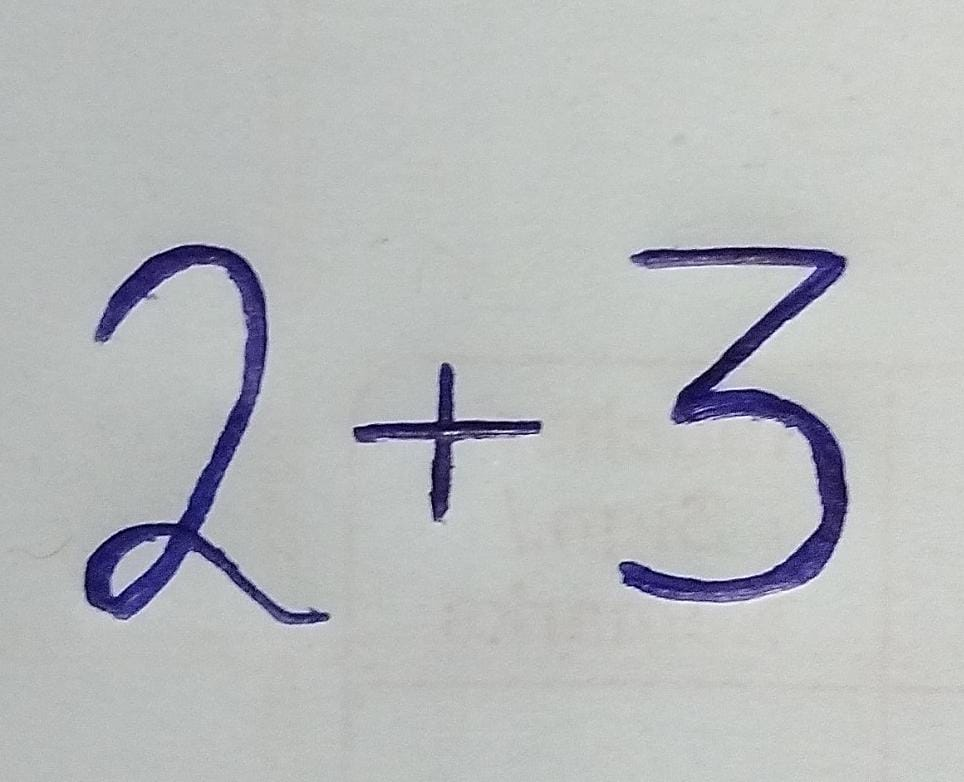

In [46]:
from IPython import display
display.Image('2+3.jpg',width = 360)

In [47]:
import cv2
import numpy as np


if img is not None:
        img = ~img
        ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
        contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        cnt = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])
        train_data = []
        rects = []

        for c in cnt:
            x, y, w, h = cv2.boundingRect(c)
            rect = [x, y, w, h]
            rects.append(rect)

        bool_rect = []
        for r in rects:
            l = []
            for rec in rects:
                flag = 0
                if rec != r:
                    if r[0] < (rec[0] + rec[2] + 10) and rec[0] < (r[0] + r[2] + 10) and r[1] < (rec[1] + rec[3] + 10) and rec[1] < (r[1] + r[3] + 10):
                        flag = 1
                    l.append(flag)
                if rec == r:
                    l.append(0)
            bool_rect.append(l)

        dump_rect = []
        for i in range(len(cnt)):
            for j in range(len(cnt)):
                if bool_rect[i][j] == 1:
                    area1 = rects[i][2] * rects[i][3]
                    area2 = rects[j][2] * rects[j][3]
                    if area1 == min(area1, area2):
                        dump_rect.append(rects[i])

        final_rect = [i for i in rects if i not in dump_rect]

        for r in final_rect:
            x = r[0]
            y = r[1]
            w = r[2]
            h = r[3]
            im_crop = thresh[y:y+h+10, x:x+w+10]
            im_resize = cv2.resize(im_crop, (28, 28))
            im_resize = np.reshape(im_resize, (28, 28, 1))
            train_data.append(im_resize)


## Prediction of a Handwritten Equation

In [49]:
eq = ''
for i in range(len(train_data)):
    train_data[i] = np.array(train_data[i])
    train_data[i] = train_data[i].reshape(1, 28, 28, 1)
    result = np.argmax(loaded_model.predict(train_data[i]), axis=-1)
    print("Raw prediction:", result[0])  
    if result[0] == 10:
        eq = eq + '-'
    elif result[0] == 11:
        eq = eq + '+'
    elif result[0] == 12:
        eq = eq + '*'
    else:
        eq = eq + str(result[0]) 
    print("Current equation:", eq)  

print("Final equation:", eq)  
evaluated_result = eval(eq)
print("Evaluated Result:", evaluated_result)

1/1 [==============================] - 0s 65ms/step
Raw prediction: 2
Current equation: 2
1/1 [==============================] - 0s 45ms/step
Raw prediction: 11
Current equation: 2+
1/1 [==============================] - 0s 58ms/step
Raw prediction: 3
Current equation: 2+3
Final equation: 2+3
Evaluated Result: 5
